#### IMPORT libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load the Dataset

In [17]:
import pandas as pd

# Load the IMDB dataset
file_path = 'dataset.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


#### Data Cleaning

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialize stemmer
stemmer = PorterStemmer()

# Function to clean and preprocess text with progress updates
def preprocess_text_with_progress(text, idx, total):
    # Clean text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    text = text.lower()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    # Print progress
    if idx % 1000 == 0:
        print(f"Processing {idx}/{total}...")  # Show progress every 1000th row
    return ' '.join(words)

# Apply preprocessing to the 'review' column with progress updates
total_rows = len(data)
data['cleaned_review'] = [preprocess_text_with_progress(review, idx, total_rows) for idx, review in enumerate(data['review'])]

# Display the first few rows of the cleaned data
print(data[['review', 'cleaned_review']].head())




Processing 0/50000...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\akash\AppData\Local\Temp\ipykernel_15952\3704531628.py:18: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)


Processing 1000/50000...
Processing 2000/50000...
Processing 3000/50000...
Processing 4000/50000...
Processing 5000/50000...
Processing 6000/50000...
Processing 7000/50000...
Processing 8000/50000...
Processing 9000/50000...
Processing 10000/50000...
Processing 11000/50000...
Processing 12000/50000...
Processing 13000/50000...
Processing 14000/50000...
Processing 15000/50000...
Processing 16000/50000...
Processing 17000/50000...
Processing 18000/50000...
Processing 19000/50000...
Processing 20000/50000...
Processing 21000/50000...
Processing 22000/50000...
Processing 23000/50000...
Processing 24000/50000...
Processing 25000/50000...
Processing 26000/50000...
Processing 27000/50000...
Processing 28000/50000...
Processing 29000/50000...
Processing 30000/50000...
Processing 31000/50000...
Processing 32000/50000...
Processing 33000/50000...
Processing 34000/50000...
Processing 35000/50000...
Processing 36000/50000...
Processing 37000/50000...
Processing 38000/50000...
Processing 39000/5000

#### Sentiment Analysis

In [19]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify polarity: Positive if polarity > 0, Negative if polarity <= 0
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_review'].apply(get_sentiment)

# Display the first few rows with sentiment
print(data[['cleaned_review', 'sentiment']].head())


                                      cleaned_review sentiment
0  one review mention watch oz episod youll hook ...  positive
1  wonder littl product br / > < br / > film tech...  positive
2  thought wonder way spend time hot summer weeke...  positive
3  basic there famili littl boy jake ) think 's z...  positive
4  petter mattei love time money '' visual stun f...  positive


#### Visualize

C:\Users\akash\AppData\Local\Temp\ipykernel_15952\3572536006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


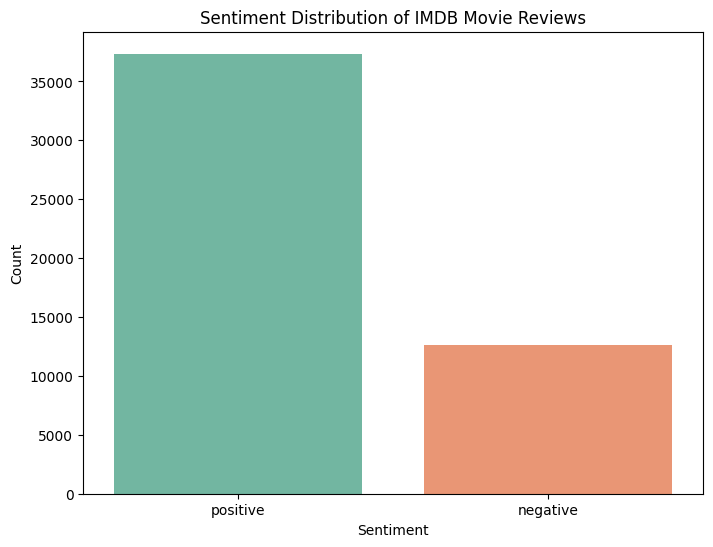

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution of IMDB Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
